This notebook takes video2 for example.

In [1]:
import pandas as pd
from google.colab import drive
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from tabulate import tabulate
from matplotlib import gridspec

nltk.download('punkt')
nltk.download('stopwords')

# Mount Google Drive: Link this colab to Drive, where I save the comments scraped from Tiktok
drive.mount('/content/drive')

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Define the analyze_sentiment function
def analyze_sentiment(comment):
    result = sentiment_pipeline(comment)
    return result[0]['label'], result[0]['score']

# Load comments from CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/p3/p3_tiktok/comments/video2/India_terrible_pollution.csv'
df = pd.read_csv(csv_file_path)

# Analyze sentiment for each comment
df['Sentiment'], df['Score'] = zip(*df['comment'].apply(analyze_sentiment).tolist())

# Save the results to a new CSV file
output_csv_path = '/content/drive/MyDrive/p3/p3_tiktok/comments/video2/India_terrible_pollution_sentiment_results.csv'
df.to_csv(output_csv_path, index=False)
print(f"Results saved to: {output_csv_path}")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
all_comments = ' '.join(df['comment'])
tokens = nltk.word_tokenize(all_comments.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Results saved to: /content/drive/MyDrive/p3/p3_tiktok/comments/video2/India_terrible_pollution_sentiment_results.csv


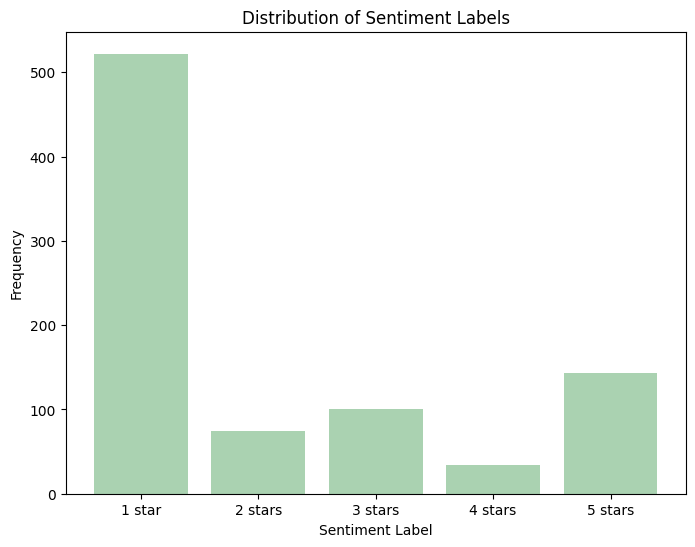

In [2]:
# Plot distribution of sentiment labels
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
ax1.bar(df['Sentiment'].value_counts().sort_index().index, df['Sentiment'].value_counts().sort_index(), color='#86bf91', alpha=0.7)
ax1.set_title('Distribution of Sentiment Labels', fontsize=12)
ax1.set_xlabel('Sentiment Label', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_xticks(df['Sentiment'].value_counts().sort_index().index)
ax1.tick_params(axis='both', labelsize=10)
ax1.text(0.02, 0.85, '' ,transform=ax1.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))
plt.show()


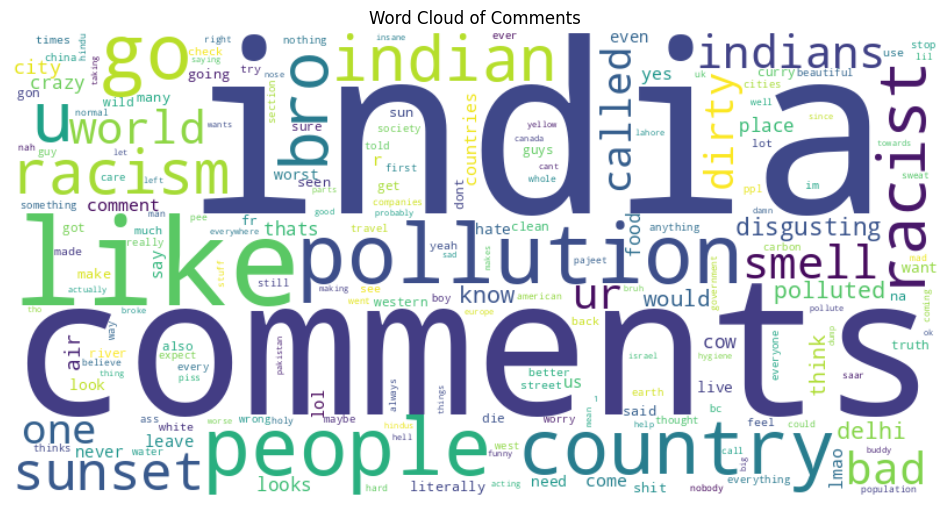

In [3]:
# Get most frequent keywords
word_counter = Counter(filtered_tokens)
most_common_keywords = pd.DataFrame(word_counter.most_common(15), columns=['Keyword', 'Frequency'])

# Plot Word Cloud
plt.figure(figsize=(12, 8))
ax2 = plt.gca()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Word Cloud of Comments', fontsize=12)
plt.show()
